# Peatland simulator SUSI, thoroughly revised version 2022
## - Mechanistic model for peatland hydrology, biogeochemistry and forest growth

<h3><center>Annamari (Ari) Laurén, University of Eastern Finland </center></h3>


### Original version based on:
Laurén, A.; Palviainen, M.; Launiainen, S.; Leppä, K.; Stenberg, L.; Urzainki, I.; Nieminen, M.; Laiho, R.; Hökkä, H. Drainage and Stand Growth Response in Peatland Forests—Description, Testing, and Application of Mechanistic Peatland Simulator SUSI. Forests 2021, 12, 293. https://doi.org/10.3390/f12030293



<p float="left">
  <img src="https://ii-es.com/wp-content/uploads/2016/12/logo-universityfinland-300x229.png" width="250" />
  <img src="https://www.luke.fi/wp-content/uploads/2015/02/Luke_EN_virall_WEB.jpg" width="250" /> 
  <img src="https://www.sttinfo.fi/data/images/00173/f93a68a8-ff62-4165-98e5-5758f92f7a64-w_960_h_960.jpg" width="250" />
</p>



## 0 Most recent updates


---
Mar 2022
- New architecture: class variables 
- Revised main program
- Revised soil hydrology routine: bugs in surface runoff corrected
- Distributed organic matter decomposition model developed and implemented
    - Mass, N, P, K and DOC routines
- All outputs to netcdf file, visualization outside the simulation 
- Dynamic leaf model adjusting according to soil nutrient status
    - leaf nutrient content, leaf mass, longevity
- Residence time calculation

---



# 1 Introduction to SUSI

---


## 1.1 Welcome to SUSI user

<p float="left">
  <img src="https://cdn3.iconfinder.com/data/icons/celebrations-flat-colorful/614/4652_-_Fireworks-512.png
" width="100" />
</p>


Susi is a mechanistic ecosystem model that is designed to help you to find peatland management schemes that are socially and environmentally bearable; socially and economically equitable; and environmentally and economically viable.  

First we have a short introduction to **theory and principles** behind SUSI, and then we walk step by step **guide** to install the model and to start the use. Finally, we take a look of model **outputs** and their interpretations. 

In the first sight the the interface may seem complicated. Don't be frightened, almost **all steps are automatic** and no high-level IT skills are needed!

**To start**:

<font color='red'> **Open susi_interface in playground mode** </font>; you can modify code and do runs, but the changes will not be saved to the main interface. Then you allow others operate with a functional model in the case that something goes wrong. This is done in File > Open in playground mode. 

---




## 1.2 Short model description
SUSI describes hydrology, biogeochemical processes and stand growth along a 2D cross-section between two parallel ditches (**Figure 1a**). The structure of SUSI is modular (**Figure 1b**, modules in green boxes). Hydrology modules simulate above-ground and below-ground water fluxes and storages and compute daily water table ($WT$). The peat temperature module simulates temperatures at different depths in the peat ($T_{peat}$). $WT$ and $T_{peat}$ affect the organic matter decomposition rate ($OM_{decroot}$) and the supply of nutrients. Furthermore, $WT$ directly controls net primary production ($NPP$) by scaling it down in case $WT$ is too high through air-filled posrosity function ($f(ϵ_A)$) or if too low with drought function ($f_w$). The nutrient balance module allocates the nutrient supply to stand, litter and ground vegetation, and together with the $NPP$ module they provide constraints for the stand growth module. The new stand volume follows Liebig’s law so that the new stand volume, at the end of the annual time step, is set to the minimum supported by $NPP$ ($V_{NPP}$) or by the supply of N, P or K ($V_{N,P,K}$). The new stand dimensions resulting from the growth are determined by allometric functions and have a feedback to the hydrology, decomposition, ground vegetation and NPP modules. The main computational loop uses a daily time step while the stand growth, ground vegetation and nutrient balance modules are updated annually. SUSI outputs include $WT$, stand growth rates, above-ground biomass and nutrient and water balance components. The model variables and their units are presented in Abbreviations of Laurén et al 2021.

<p float="left">
  <img src="https://www.mdpi.com/forests/forests-12-00293/article_deploy/html/images/forests-12-00293-g002.png" width="750" />
</p>

**Figure** **1**. **(a)** The Peatland simulator SUSI describes hydrology,biogeochemical processes and stand growth along a 2D crosssection between two parallel ditches. The variables in orange boxes were used to parameterize the model. **(b)** Information flow in SUSI. The model is initialized using forest inventory data and site characteristics (orange boxes) and is run using daily meteorology (blue box). Independent modules (green boxes, numbers refer to chapters in the text) are linked through state variables and fluxes (grey boxes, see symbols from Abbreviations). The basic computation loop runs at a daily time step, whereas the modules in dashed boxes are updated at the end of each simulation year. The model predicts, for instance,
stand growth and yield and nutrient and water balance (purple box) responses to forest management.


---



## 1.3 SUSI in Google Colab environment
Google colab is a modern Python-language environment for distribution, collaborative development and use of modelling projects. Some Colab  characteristics might feel weird for users having a laptop-background. Advantages, however, are remarkable.  

<p float="left">
  <img src="https://miro.medium.com/max/3000/1*7oukapIBInsovpHkQB3QZg.jpeg" width="250" />
</p>


**Advantages**
*   You can access Colab from any computer using a web-browser only
*   There is no program requirements for your computer and you don't install anything to your own computer 
*   All computations take place in Google's server and simulations do not consume your own computer's resources
*   Smooth connection to source code and input files through GitHub
*   Computation is rather efficient
*   Visual and very informative: Creative combination of text, figures, equations, web-resources, code, and computation
* Everything is tuneable: you can modify any part of the code, inputs or outputs
* You can run Linux/Unix commands in the code cells as well

**Disadvantages**
*   Installed files or computed outputs are removed from the folder when the connection to the server is cut 
*   Somewhat nerdy
*   You need a Google account. However, it is free. If you don't have a personal Google account and you don't want one, you can create a work account just for this project.


---



## 1.4 Using Goole Colab
Google Colab functions like Jupyter Notebook in laptop world. 

<p float="left">
  <img src="https://static.thenounproject.com/png/25280-200.png" width="150" />
</p>



**Navigating**

Leftmost panel contains the **Table of contents**, which you can use to navigate in the project. Below the index button, there are search, tips and folder icons. All the files that you upload or output, can be found through the folder icon. In the  folder environment, you can also upload files for the project.

**Cells**

Colab contains two types of cells. **Text cells**, like this, may contain text, figures, or equations. **Code cells** contain executable python code and comments (net executed) separated by #.

**Running the code cells**

There are several options for running the code cells. Codes are executed in cells. Note that the order of running matters: the memory contins the previous entry to the variable.   
1.   Single cells are run hitting **Ctrl-enter**, or with the **play** icon in the cell.
2.   All cells are run by **Ctrl-F9** or in the upper panel selections Runtime > Run all
3. Cells before are run by **Ctrl-F8**, or Runtime > Run before
4. Cells after are run by **Ctrl-F10**, or Runtime > Run after

# 2 Install SUSI





---






<p float="left">
  <img src="https://pypi.org/static/images/logo-large.6bdbb439.svg
" width="200" />
</p>


Here we install and import all needed python libraries and clone SUSI from GitHub, import its' modules, and adjust pythonpath as required. 
---

In [3]:
# Import all official libraries that are by default in the Colab
import numpy as np
import pandas as pd
import datetime
import configparser
import argparse
import matplotlib.pylab as plt
import seaborn as sns
import sys
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.misc import derivative
from scipy.interpolate import InterpolatedUnivariateSpline as interS
from scipy.sparse import  diags
from scipy.sparse.linalg import  spsolve
#----------------------------------------------------------------------------
# Install non-standard packages
!pip install xlsxwriter
!pip install xlrd==1.2.0
!pip install pyproj
from pyproj import CRS, Transformer

#----------------------------------------------------------------------------
!git clone https://github.com/annamarilauren/susi_2022                          # clone susi codes and files
!mkdir /content/susi_2022/outputs/

newpathsusi = '/content/susi_2022' 
if newpathsusi not in sys.path:  
  sys.path.insert(0,newpathsusi)
sys.path

# -----------------------------------------------------------------------------
from susi.susi_utils import read_FMI_weather
from inputs.susi_para import get_susi_para
from susi.susi_main import Susi

print ('SUSI is ready to run!')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'susi_2022'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 231 (delta 129), reused 159 (delta 61), pack-reused 0
Receiving objects: 100% (231/231), 1.75 MiB | 5.86 MiB/s, done.
Resolving deltas: 100% (129/129), done.
SUSI is ready to run!


# 3 Running SUSI

<p float="left">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyKsoJ6MbWTYlRlLwYLsQyI4FSYajLWuBRi0xo-wa_CSgTnTMmhshJU5LMc4ktfeNtwQU&usqp=CAU
" width="300" />
</p>


Now we have everything to start running SUSI. First we import the SUSI functions needed to fetch and process the weather data and the growth and yield data. You can draw figures from the inputs to have an overview of the simulation setup. 


---



### 3.1 Default inputs

In [4]:
folderName='/content/susi_2022/outputs/'                                        # output folder
inpath = '/content/susi_2022/inputs/'                                            # folder where weather files are
mottifile = {'path':inpath,
              'dominant':{1: 'motti viitasaari_mtkg.xls'},
              'subdominant':{0:'susi_motti_input_lyr_1.xlsx'},
              'under':{0:'susi_motti_input_lyr_2.xlsx'}} 

wdata='parkano_weather.csv'

start_date = datetime.datetime(2000,1,1)
end_date=datetime.datetime(2002,12,31)
start_yr = start_date.year 
end_yr = end_date.year
yrs = (end_date - start_date).days/365.25

sarkaSim = 40.                                                                  # strip width, ie distance between ditches, m
n = int(sarkaSim / 2)                                                           # number of computation nodes in the strip

ageSim = {'dominant': 45.*np.ones(n),
          'subdominant': 0*np.ones(n),
          'under': 0*np.ones(n)}                                                         # age of the stand in each node

sfc =  np.ones(n, dtype=int)*3                                                                        # site fertility class

#ageSim['dominant'][int(n/2):] = 2.
#ageSim[4:-4] = 2.

site = 'develop_scens'

forc=read_FMI_weather(0, start_date, end_date, sourcefile=inpath+wdata)           # read weather input
            
wpara, cpara, org_para, spara, outpara, photopara = get_susi_para(wlocation='undefined', peat=site, 
                                                                          folderName=folderName, hdomSim=None,  
                                                                          ageSim=ageSim, sarkaSim=sarkaSim, sfc=sfc, 
                                                                          n=n)
#spara['canopylayers']['dominant'][int(n/2):] = 2                                                                        
#spara['canopylayers']['subdominant'][:int(n/2)] = 1                                                                        



 + Reading meteorological input file from 
    - /content/susi_2022/inputs/parkano_weather.csv


### 3.2 Adjust profile, stand, management or weather as you like

In [5]:
# Adjust the run parameters if you like
 
spara['L']= 40.0                        # strip width, m 25...55 
spara['n']= int(spara['L']/2)           # number of computation nodes  
 
spara['depoK']= 1.0                     # atmospheric deposition kg / ha / yr
spara['depoN']= 4.0                       
spara['depoP']= 0.1

#++++++ Ash fertilization +++++++++++++++++++++++++++++
spara['fertilization']['application year'] = 2050         # year of application, check consistency with simulation time
spara['fertilization']['P']['dose'] = 0.0 #45.0                 # kg / ha of elemental P 
spara['fertilization']['K']['dose'] = 0.0 #100.0               # kg / ha of elemental K

#+++++++ These go together, same amount of entries in the list
spara['ditch depth east']= [-0.3, -0.6, -0.9]       # ditch depths, m. The first one is the reference depth
spara['ditch depth west']= [-0.3, -0.6, -0.9]
spara['ditch depth 20y east']= [-0.3,  -0.6, -0.9]     # ditch depth after 20 yrs
spara['ditch depth 20y west']= [-0.3, -0.6, -0.9]
spara['scenario name']= ['Control','DNM60', 'DNM90']    # give the scenario names
#+++++++++ Until here
 
spara['peat type']= ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']   # peat type 'S' is sphagnum, 'A' is carex
spara['peat type bottom']= ['A'] 
#spara['peat type']= ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']   # peat type 'S' is sphagnum, 'A' is carex
#spara['peat type bottom']= ['S'] 
 
spara['peatK']= None                              # peat nutrient contents, unit (?)
spara['peatN']= None
spara['peatP']= None
#spara['sfc'] = 3                                   # site fertility group 1: most fertile 6: least fertile
spara['sfc_specification'] = 1                    # disticntion between myrtillus I and II, and vaccínium I and II types
spara['vonP top']= [2,2,2,3,4,5,6,6]              # decomposition of top peat layers (5 cm each)
spara['vonP bottom']= 8                           # decompoosition of peat profile, subsoil throughout
spara

{'sitename': 'susirun',
 'species': 'Pine',
 'sfc': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 'sfc_specification': 1,
 'hdom': None,
 'vol': None,
 'age': {'dominant': array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
         45., 45., 45., 45., 45., 45., 45.]),
  'subdominant': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  'under': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.])},
 'smc': 'Peatland',
 'nLyrs': 50,
 'dzLyr': 0.05,
 'L': 40.0,
 'n': 20,
 'ditch depth west': [-0.3, -0.6, -0.9],
 'ditch depth east': [-0.3, -0.6, -0.9],
 'ditch depth 20y west': [-0.3, -0.6, -0.9],
 'ditch depth 20y east': [-0.3, -0.6, -0.9],
 'scenario name': ['Control', 'DNM60', 'DNM90'],
 'initial h': -0.2,
 'slope': 0.0,
 'peat type': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
 'peat type bottom': ['A'],
 'anisotropy': 10.0,
 'vonP': True,
 'vonP top': 

### 3.3 Check weather data

<p float="left">
  <img src="https://thumbs.dreamstime.com/b/weather-icons-set-isolated-white-background-clouds-logo-sign-collection-black-blue-yellow-colors-simple-modern-176834343.jpg
" width="300" />
</p>


If you like, you can now check your weather data for the simulation time. The command below draws a figure with daily temperature and rainfall; and annual bar chart for mean temperature and cumulative precipitation. **This phase is not compulsory.**


---




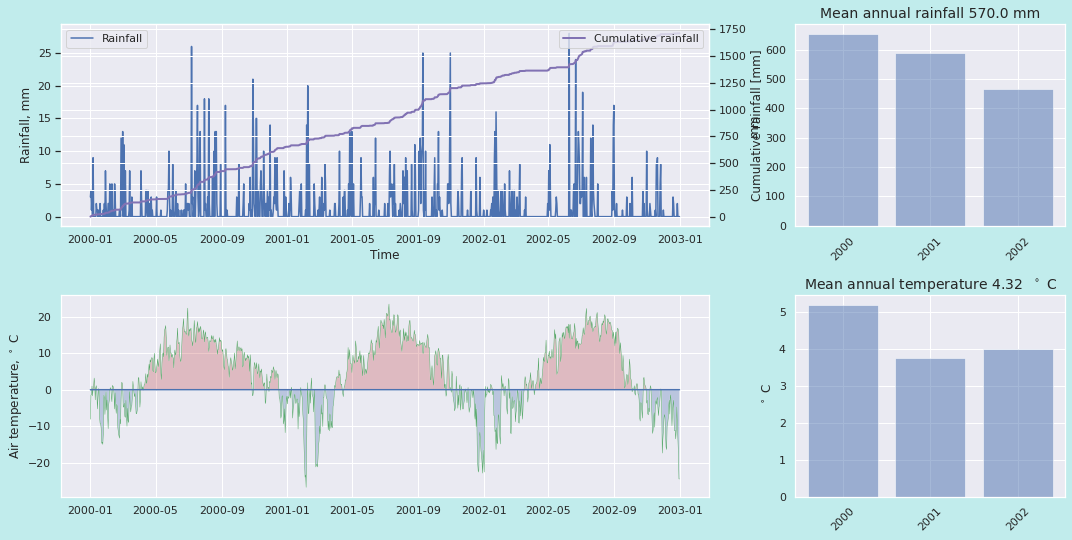

In [6]:
from susi.susi_io import *
weather_fig(forc)        #Draw the weather input figure

### 3.4 Run the simulation

In [7]:
susi = Susi()
 
susi.run_susi(forc, wpara, cpara, org_para, spara, outpara, photopara, start_yr, end_yr, wlocation = 'undefined', 
                                mottifile=mottifile, peat= 'other', photosite='All data', 
                                folderName=folderName,ageSim=ageSim, sarkaSim=sarkaSim, sfc=sfc)
    

******** Susi-peatland simulator v.10 (2022) c Annamari Laurén *********************
           
Initializing stand and site:
**** creating Susi netCDF4 file: /content/susi_2022/outputs/susi.nc ****
    + netCDF file created
      - Weather input: Undefined, Finland , start: 2000 , end: 2002
      - Latitude: 6885000 , Longitude: 3275000
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
dominant initialized
subdominant initialized
under initialized
  + Site:
   + Number of columns: 20
    - Site fertility class:
     [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
  + Stand:
    - age:
        dominant: [45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45.
 45. 45.] yrs
        subdominat: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] yrs
        under: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] yrs
  + Soil: 
    - peat top: A , von P: 2
    -

/content/susi_2022/susi/canopylayer.py:226: RuntimeWarning: invalid value encountered in true_divide
  self.NPP = self.NPP * nut_stat / self.stems  * 1.1                     # returned back to tree basis unit
/content/susi_2022/susi/canopylayer.py:227: RuntimeWarning: invalid value encountered in true_divide
  self.NPP_pot = self.NPP_pot * nut_stat / self.stems * 1.1               # returned back to tree basis units


  - day # 730  hdom  13.37  m,  LAI  1.96  m2 m-2
  - day # 730 iterations 3
  - day # 1095  hdom  13.7  m,  LAI  2.05  m2 m-2
  - day # 1095 iterations 3
***********************************
Computing canopy and soil hydrology  1096  days scenario: DNM60
Resetting strip scenario
  - day # 0  hdom  12.8  m,  LAI  1.85  m2 m-2
  - day # 0 iterations 8
  - day # 365  hdom  12.8  m,  LAI  1.85  m2 m-2
  - day # 365 iterations 5
  - day # 730  hdom  13.38  m,  LAI  1.96  m2 m-2
  - day # 730 iterations 4
  - day # 1095  hdom  13.74  m,  LAI  2.06  m2 m-2
  - day # 1095 iterations 1
***********************************
Computing canopy and soil hydrology  1096  days scenario: DNM90
Resetting strip scenario
  - day # 0  hdom  12.8  m,  LAI  1.85  m2 m-2
  - day # 0 iterations 9
  - day # 365  hdom  12.8  m,  LAI  1.85  m2 m-2
  - day # 365 iterations 5
  - day # 730  hdom  13.38  m,  LAI  1.96  m2 m-2
  - day # 730 iterations 4
  - day # 1095  hdom  13.75  m,  LAI  2.06  m2 m-2
  - day # 1095 

## Draw figures

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


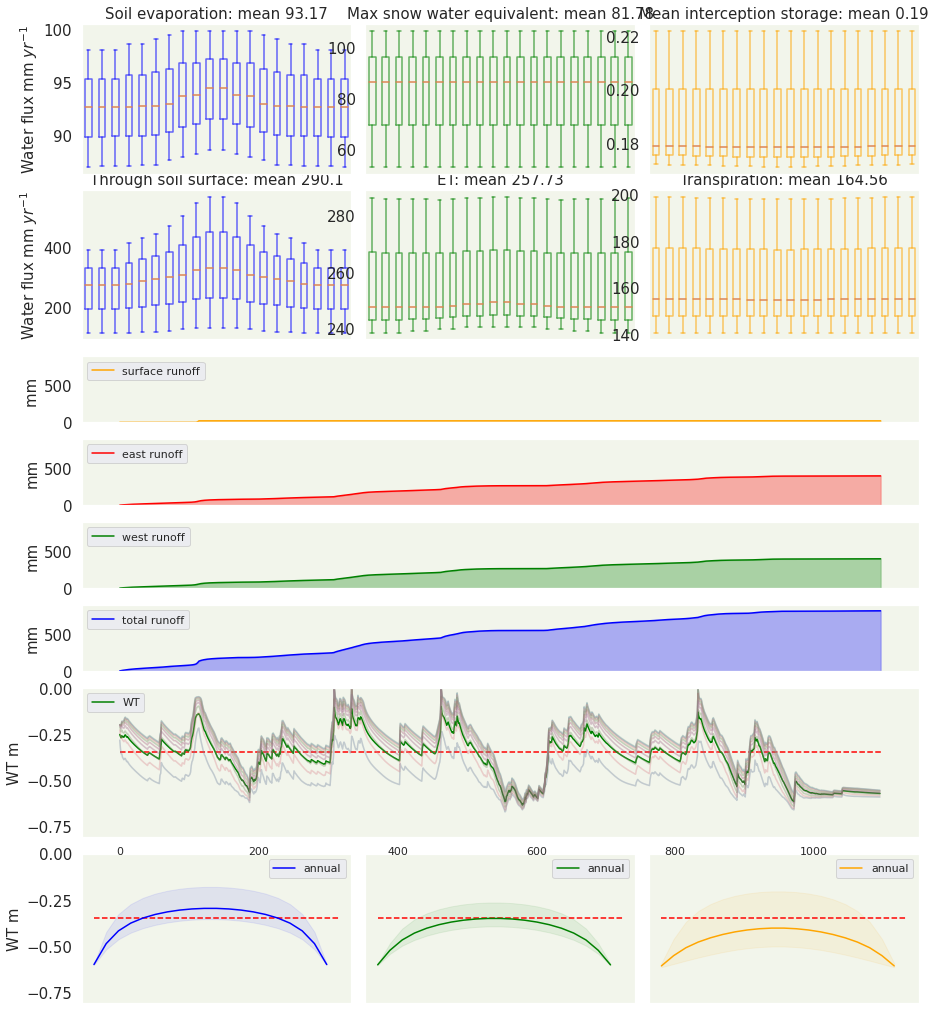

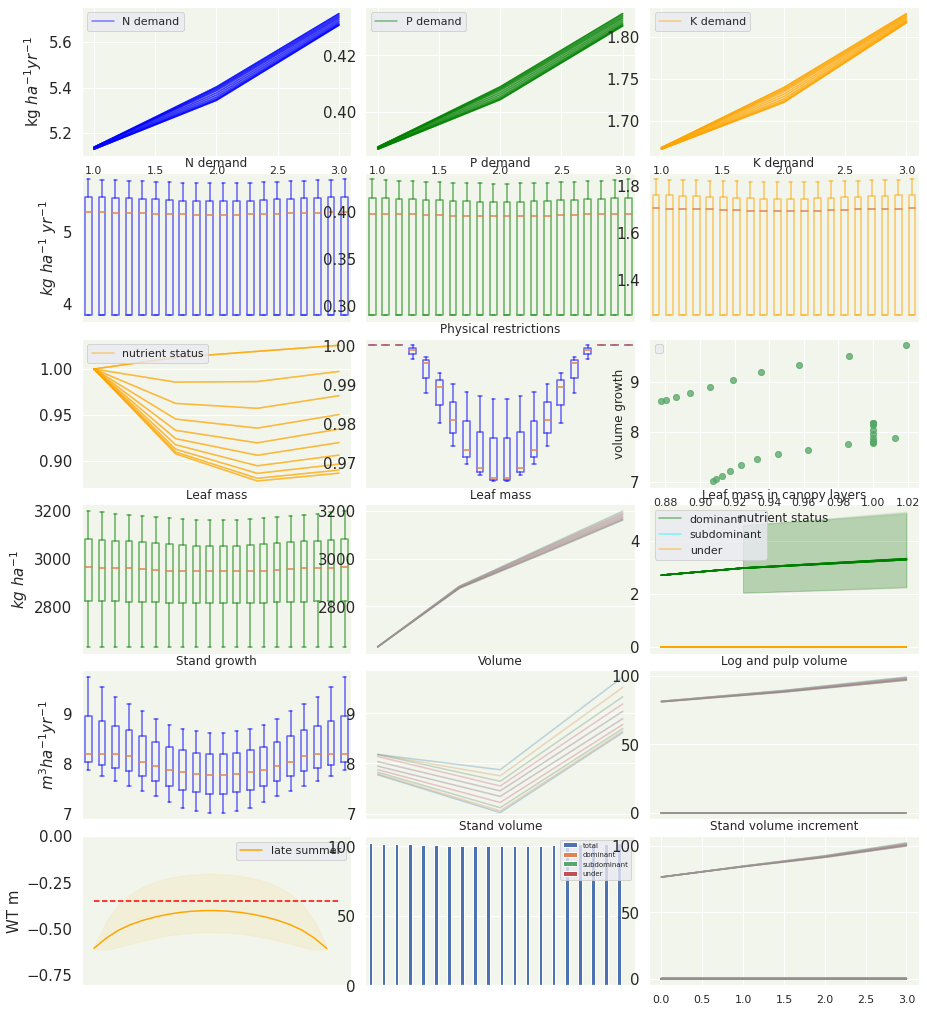

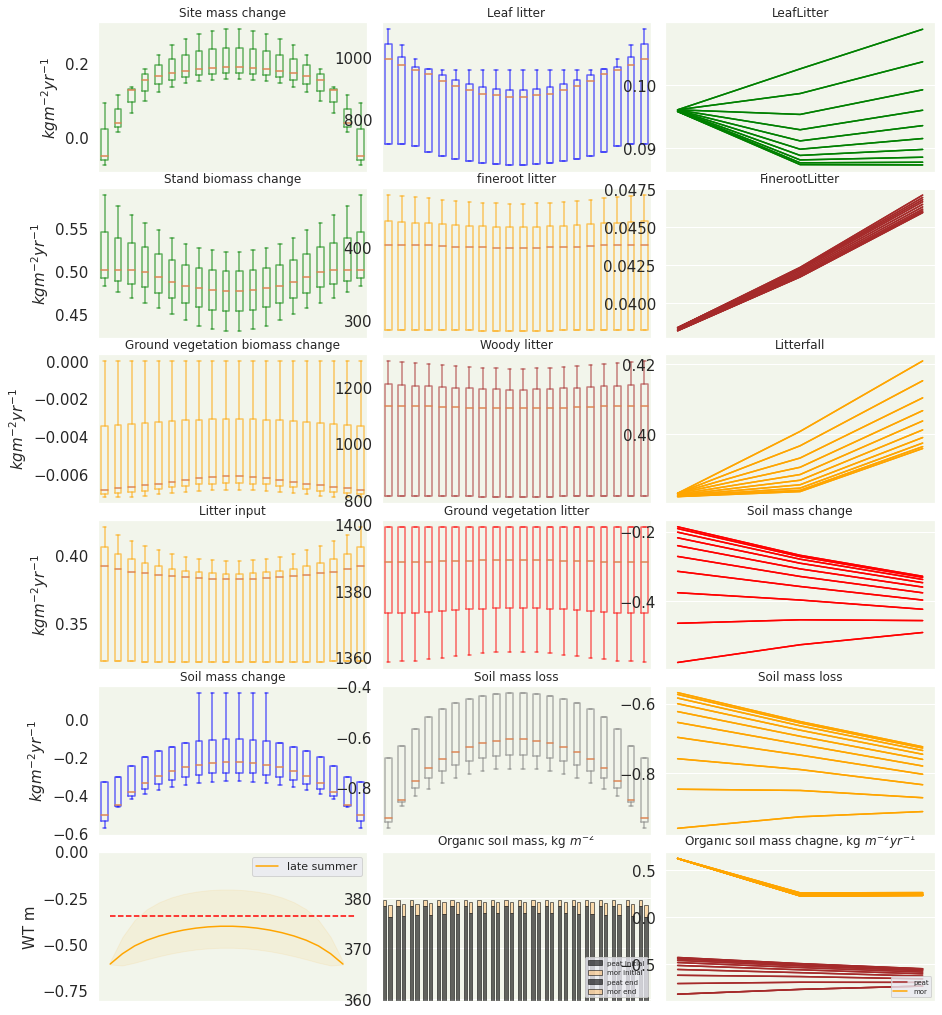

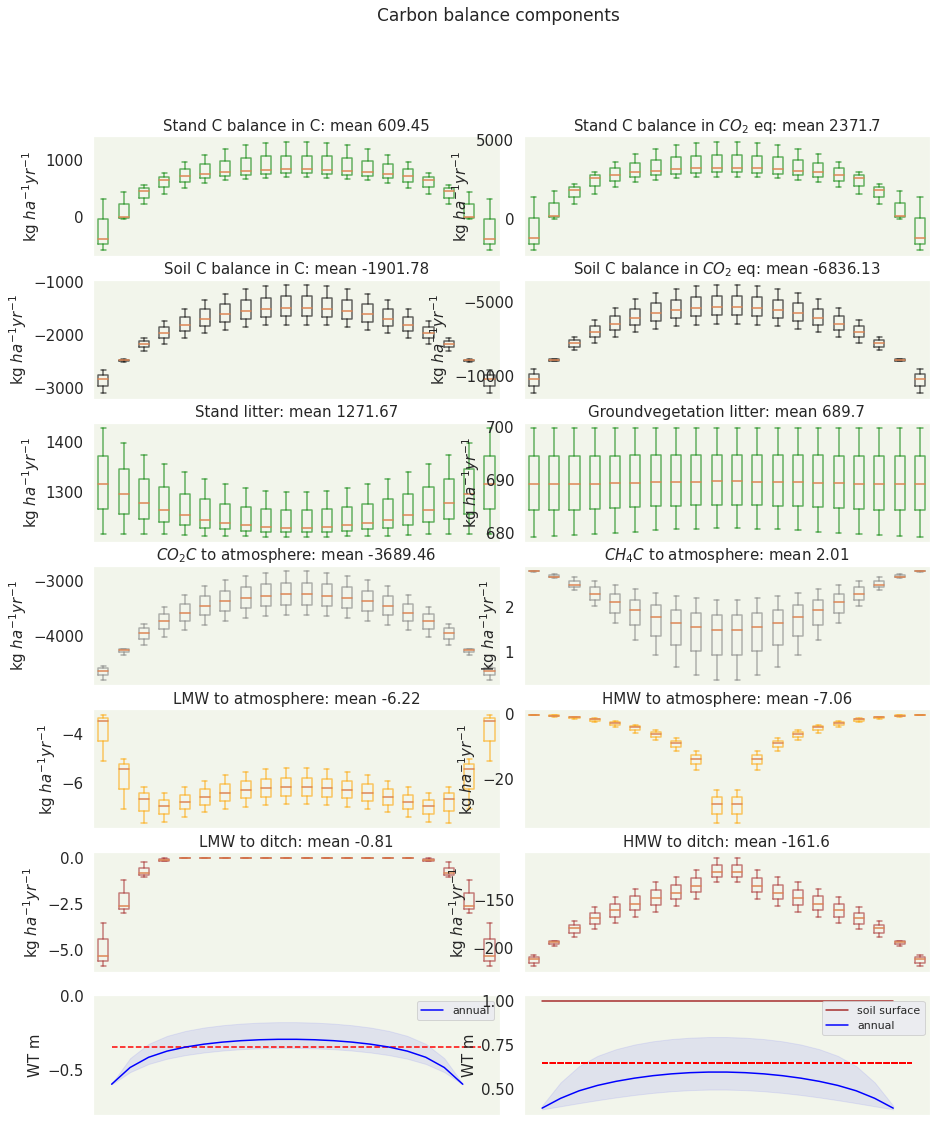

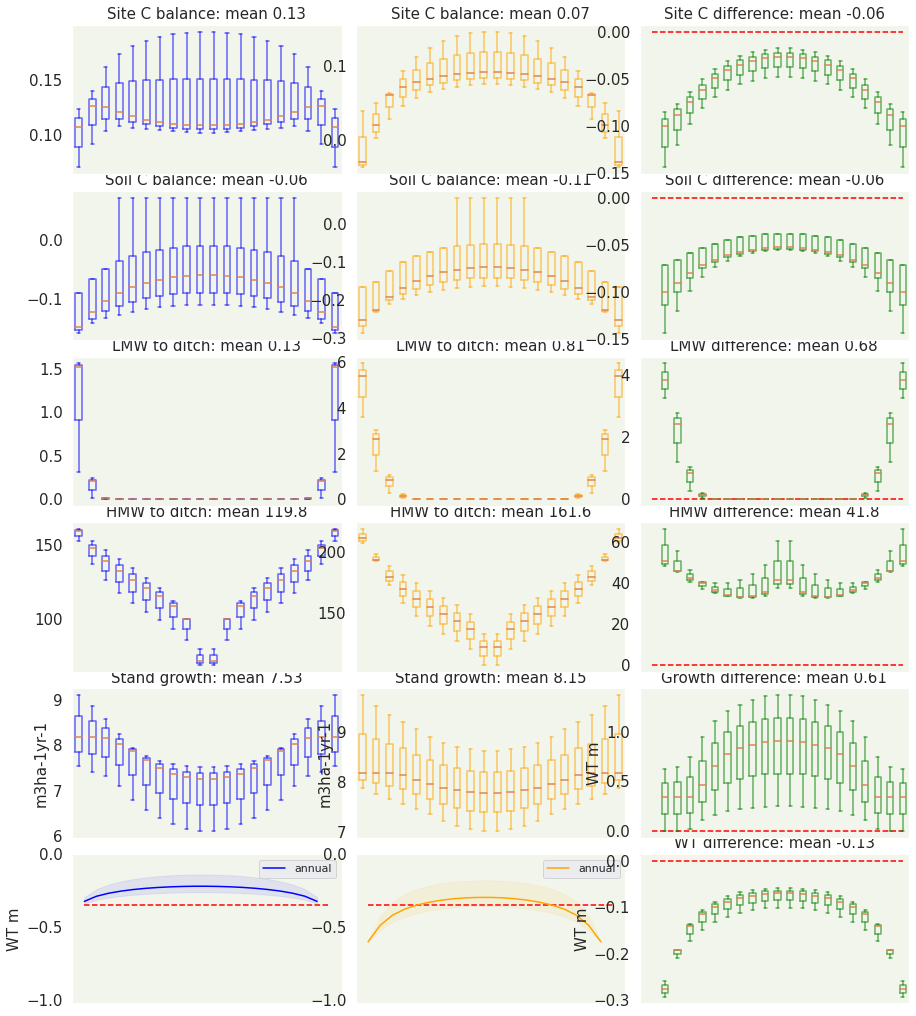

In [9]:
from susi.figures import *
from netCDF4 import Dataset 

ff = r'/content/susi_2022/outputs/susi.nc'
scen = 1
hydrology(ff, scen)
stand(ff, scen)
mass(ff, scen)
carbon(ff, scen)
compare_1(ff, [0,1])


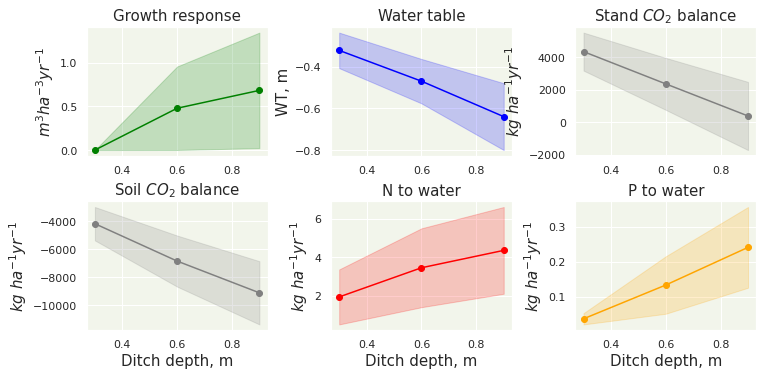

In [10]:
import dataframe_image
compare_scens(ff)

In [2]:
#This removes files if you have to upload the input files again

!rm -rf /content/susi_2022/

